<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** A neuron is the fundamental building block of a neural network. It consists of a set of weights (used to generate a weighted sum of inputs) and an activation, or transfer, function (run on the aforementioned weighted sum to produce an output).

- **Input Layer:** Neurons in the first, or input, layer of a neural network contain a number weights equal to the number of external inputs, bias term included.

- **Hidden Layer:** Every neural network does not contain a hidden layer, although most do, and this is necessary for complete classification of problems that are not linearly separable. Nodes in a hidden layer contain a number of weights equal to the number of nodes in the previous layer, plus an optional bias term. ReLU activation functions are very commonly used in hidden layers.

- **Output Layer:** Neurons in the output layer of a neural network contain a number of weights equal to the number of neurons in the preceding layer, plus an optional bias term. Many networks have only a single output neuron, although some may have more. 

- **Activation:** The activation function of a neuron transforms the weighted sum it calculates into an output (generally with some given set of properties). Common activation functions include the sigmoid and tanh functions, as well as the ReLU family of functions. The identity function can also be considered an activation function!

- **Backpropagation:** Just as a neural network propagates information about its inputs *forward* through its layers, so it propagates information about the error as compared with a target output *backward* through those same layers. This allows the weights in those layers to be updated little by little, gradually reducing the error produced by the network.

## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [1]:
# Import libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import optimize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Set random seed for reproducibility.
np.random.seed(0)

In [3]:
# Load data.
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [4]:
# Check data shape.
candy.shape

(10000, 3)

In [5]:
# Preview data.
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


In [6]:
# Candies that are neither chocolate nor gummy.
# Mostly not eaten (94.4%).
candy[candy['chocolate'] + candy['gummy'] == 0]['ate'].value_counts()

0    2377
1     141
Name: ate, dtype: int64

In [7]:
# Candies that are gummy but not chocolate.
# Mostly eaten (94.8%).
candy[(candy['chocolate'] == 0) & (candy['gummy'] == 1)]['ate'].value_counts()

1    2360
0     131
Name: ate, dtype: int64

In [8]:
# Candies that are chocolate but not gummy.
# Mostly eaten (94.8%).
candy[(candy['chocolate'] == 1) & (candy['gummy'] == 0)]['ate'].value_counts()

1    2359
0     130
Name: ate, dtype: int64

In [9]:
# Candies that are both chocolate and gummy.
# Mostly not eaten (94.4%).
candy[candy['chocolate'] + candy['gummy'] == 2]['ate'].value_counts()

0    2362
1     140
Name: ate, dtype: int64

In [10]:
# Do not do any feature engineering (xor function).
xor_candy = (candy['chocolate'] + candy['gummy']) % 2
(xor_candy == candy['ate']).value_counts()

True     9458
False     542
dtype: int64

In [11]:
# Do not normalize any feature engineering (it's just moving
# the decimal point anyway, since we have an even 10k examples.
#
# (Exclusive or accuracy 94.6%.)
(xor_candy == candy['ate']).value_counts(normalize='True')

True     0.9458
False    0.0542
dtype: float64

### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data analysis code) after your perceptron implementation. 

In [12]:
# Define input matrix and target output.
X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values

In [13]:
class Perceptron():
  """
  The perceptron class from our module one assignment.
  """

  def __init__(self,
               activation='sigmoid',
               learning_rate=0.01,
               max_epochs=1000):
    self.activation = activation
    self.learning_rate = learning_rate
    self.max_epochs = max_epochs
    
  def sigmoid(self, x):
    """
    The sigmoid function.
    """
    return 1 / (1 + np.exp(-x))

  def d_sigmoid(self, x):
    """
    The derivative of the sigmoid function. For gradient descent.
    """
    return self.sigmoid(x) * (1 - self.sigmoid(x))

  def predict(self, inputs):
    """
    Add bias term; generate predictions.
    """
    inputs = np.c_[np.ones(len(inputs)), inputs]
    return self.sigmoid(np.dot(inputs, self.weights))

  def predict_bias(self, inputs_with_bias):
    """
    Generate predictions - used when the inputs already include a bias.
    """
    return self.sigmoid(np.dot(inputs_with_bias, self.weights))

  def train(self, inputs, target):
    """
    Fit the perceptron to a given input dataset and target output.
    """
    # Add bias term.
    input = np.c_[np.ones(len(inputs)), inputs]

    # Adjust dimensionality for single-column target - we don't want to type a
    # bunch of nested brackets.
    target = np.expand_dims(target, axis=1)

    # Initialize random weights in the range (-1, 1).
    self.weights = 2 * np.random.random((len(input[0]), 1)) - 1

    for epoch in range(self.max_epochs):
        prediction = self.predict_bias(input)
        error = prediction - target
        gradient = self.d_sigmoid(np.dot(input, self.weights))
        adjustments = self.learning_rate * error * gradient
        self.weights = self.weights - np.dot(input.T, adjustments)

In [14]:
# Instantiate perceptron.
p = Perceptron(max_epochs=100)

In [15]:
# Train perceptron model.
p.train(X, y)

In [16]:
# Output predictions from the trained model.
perceptron_predictions = np.rint(p.predict(X)).astype(int)

In [17]:
# Summarize predictions (2518 not eaten, 7482 eaten).
np.bincount(np.squeeze(perceptron_predictions))

array([2518, 7482], dtype=int64)

### Simple Perceptron Accuracy

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the simple perceptron architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and optional data analysis code) after your perceptron implementation. 

In [18]:
# Report simple perceptron accuracy.
accuracy_score(y, perceptron_predictions)

0.7236

### Simple Perceptron Accuracy (Explanation)

A simple perceptron can only completely classify a linearly separable function. The exclusive or (xor) function, which this data approximates (94.6% accuracy), is not linearly separable.

100% accuracy will not be achievable, however, even with a multilayer perceptron, because the data is not perfectly clean (it only _approximates_ the xor function - identical inputs do not always produce identical output).

I have no idea what I've done wrong (or non-simple?) to get about 72% accuracy here, though.

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [19]:
class MLP:
    """
    A simple multilayer perceptron, or feed-forward neural network.
    """
    def __init__(self, inputs=2, hiddenNodes=[3], outputNodes=1):
        # Set up Architecture of Neural Network
        self.inputs = inputs
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes

        # Initial Weights
        if len(hiddenNodes) == 0:
            self.weights = [np.random.rand(self.inputs, self.outputNodes)]
        else:
            self.weights = [np.random.rand(self.inputs, self.hiddenNodes[0])]
            for i in range(1, len(hiddenNodes)):
                self.weights.append(np.random.rand((hiddenNodes[i-1]), hiddenNodes[i]))
            self.weights.append(np.random.rand(hiddenNodes[-1], outputNodes))
        
    def sigmoid(self, s):
        """
        The sigmoid function.
        """
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        """
        The derivative of the sigmoid function. For gradient descent.
        """
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """      
        # Weighted sum of inputs => hidden layer
        weighted_sum = np.dot(X, self.weights[0])
        self.activated_outputs = [self.sigmoid(weighted_sum)]
        for i in range(1, len(self.weights)):
            weighted_sum = np.dot(self.activated_outputs[i-1], self.weights[i])
            self.activated_outputs.append(self.sigmoid(weighted_sum))
                
        return self.activated_outputs[-1]
        
    def backward(self, X, y, o):
        """
        Backward propagate error & updates through the network.
        """
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        z2_error = self.o_delta.dot(self.weights[-1].T)

        # Adjustment to final set of weights (hidden => output)
        if len(self.weights) == 1:
            self.weights[0] += X.T.dot(self.o_delta)
            return
        
        self.weights[-1] += self.activated_outputs[-2].T.dot(self.o_delta)
        
        # Hidden layer error
        for i in reversed(range(2, len(self.weights))):
            z2_delta = z2_error * self.sigmoidPrime(self.activated_outputs[i-1])
            z2_error = z2_delta.dot(self.weights[i-1].T)
        
            # Adjustment to interior set of weights (hidden => hidden)
            self.weights[i-1] += self.activated_outputs[i-2].T.dot(z2_delta)
        
        # Input layer error (if not same layer as output)
        z2_delta = z2_error * self.sigmoidPrime(self.activated_outputs[0])
        self.weights[0] += X.T.dot(z2_delta)

    def train(self, X, y):
        """
        Run a single training epoch, one pass in each direction.
        """
        o = self.feed_forward(X)
        self.backward(X, y, o)

    def fit(self, X, y,  max_epochs=100, print_epochs=[]):
        """
        Fit the MLP to the given training input and target output.
        """
        for i in range(max_epochs):
            if (i+ 1 in print_epochs): 
                print('+' + '---' * 3 + f'EPOCH {i + 1}' + '---' * 3 + '+')
                print('Input: \n', X)
                print('Actual Output: \n', y)
                print('Predicted Output: \n', str(self.feed_forward(X)))
                print("Loss: \n", str(np.mean(np.square(y - self.feed_forward(X)))))
            self.train(X, y)

In [20]:
mlp = MLP(2, [2], 1)

In [21]:
mlp.fit(X, np.expand_dims(y, axis=1), 100, [100])

+---------EPOCH 100---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]
Loss: 
 0.2011500000031213


### Multilayer Perceptron Accuracy

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset.

In [22]:
# Report multilayer perceptron accuracy.
accuracy_score(y, np.rint(mlp.feed_forward(X)))

0.5

### Multilayer Perceptron Accuracy (Explanation)

The performance we're getting here is abysmal, worse than that of the simple perceptron. Perhaps we're getting stuck at a local minimum? Or perhaps the lack of a tunable learning rate is tripping us up? We're not using the ideal loss function for a binary classification problem either, but I doubt that alone is the issue.

### Multilayer Perceptron Redux

A true Stochastic GD-based implementation from Welch Labs (code taken from module 2 lecture notebook).

In [23]:
class NeuralNetwork():
    def __init__(self, inputs=2, outputs=1, hidden_neurons=3):        
        # Define Hyperparameters
        self.inputLayerSize = inputs
        self.outputLayerSize = outputs
        self.hiddenLayerSize = hidden_neurons
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs though network.
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        # Apply sigmoid activation function to scalar, vector, or matrix.
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self,z):
        # Gradient of sigmoid
        return np.exp(-z)/((1 + np.exp(-z))**2)
    
    def costFunction(self, X, y):
        # Compute cost for given X, y; use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y - self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        # Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    # Helper Functions for interacting with other classes:
    def getParams(self):
        # Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        # Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], 
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], 
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [24]:
class trainer(object):
    def __init__(self, N):
        # Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        # Make an internal variable for the callback function:
        self.X = X
        self.y = y

        # Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, 
                                 params0, 
                                 jac=True, 
                                 method='BFGS',
                                 args=(X, y), 
                                 options=options,
                                 callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [25]:
# Initialize network and trainer.
nn = NeuralNetwork()
t = trainer(nn)

In [26]:
# Train network.
t.train(X, np.expand_dims(y, axis=1))

Optimization terminated successfully.
         Current function value: 256.295819
         Iterations: 105
         Function evaluations: 149
         Gradient evaluations: 149


### Multilayer Perceptron Performance Redux

In [27]:
# Report Welch Labs multilayer perceptron accuracy.
accuracy_score(y, np.rint(nn.forward(X)))

0.9458

This is the accuracy we were looking for, but it's not my code that's getting it.

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model (for at least two hyperparameters).
When hyperparameter tuning, show your work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [28]:
# Load data.
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/'
                 'datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


In [29]:
# Instantiate scaler.
scaler = StandardScaler()

In [30]:
# Define inputs, target output.
X = scaler.fit_transform(df.drop(columns='target').values)
y = df['target'].values

In [31]:
# Check majority class frequency.
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [32]:
# Instantiate baseline model.
baseline_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=((X.shape[1],))),
    keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
# Compile baseline model.
baseline_model.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['acc'])

### Train model.

Use verbose output for ease of grading.

In [34]:
baseline_history = baseline_model.fit(X, 
                                      y, 
                                      validation_split=0.1, 
                                      epochs=100,              
                                      verbose=True)

Train on 272 samples, validate on 31 samples
Epoch 1/100
272/272 [==============================] - 1s 2ms/sample - loss: 0.7402 - acc: 0.5000 - val_loss: 0.7440 - val_acc: 0.5484
Epoch 2/100
272/272 [==============================] - 0s 63us/sample - loss: 0.7237 - acc: 0.5110 - val_loss: 0.7289 - val_acc: 0.5161
Epoch 3/100
272/272 [==============================] - 0s 66us/sample - loss: 0.7088 - acc: 0.5257 - val_loss: 0.7144 - val_acc: 0.5161
Epoch 4/100
272/272 [==============================] - 0s 63us/sample - loss: 0.6949 - acc: 0.5515 - val_loss: 0.7006 - val_acc: 0.4516
Epoch 5/100
272/272 [==============================] - 0s 62us/sample - loss: 0.6814 - acc: 0.5735 - val_loss: 0.6881 - val_acc: 0.4516
Epoch 6/100
272/272 [==============================] - 0s 66us/sample - loss: 0.6691 - acc: 0.5919 - val_loss: 0.6769 - val_acc: 0.5161
Epoch 7/100
272/272 [==============================] - 0s 66us/sample - loss: 0.6570 - acc: 0.6287 - val_loss: 0.6660 - val_acc: 0.5484
Epoc

272/272 [==============================] - 0s 55us/sample - loss: 0.3836 - acc: 0.8272 - val_loss: 0.4088 - val_acc: 0.7419
Epoch 61/100
272/272 [==============================] - 0s 56us/sample - loss: 0.3815 - acc: 0.8272 - val_loss: 0.4077 - val_acc: 0.7419
Epoch 62/100
272/272 [==============================] - 0s 59us/sample - loss: 0.3799 - acc: 0.8235 - val_loss: 0.4060 - val_acc: 0.7742
Epoch 63/100
272/272 [==============================] - 0s 55us/sample - loss: 0.3777 - acc: 0.8235 - val_loss: 0.4046 - val_acc: 0.8065
Epoch 64/100
272/272 [==============================] - 0s 52us/sample - loss: 0.3759 - acc: 0.8272 - val_loss: 0.4031 - val_acc: 0.8065
Epoch 65/100
272/272 [==============================] - 0s 69us/sample - loss: 0.3742 - acc: 0.8309 - val_loss: 0.4016 - val_acc: 0.8065
Epoch 66/100
272/272 [==============================] - 0s 55us/sample - loss: 0.3726 - acc: 0.8309 - val_loss: 0.4000 - val_acc: 0.8065
Epoch 67/100
272/272 [==============================] 

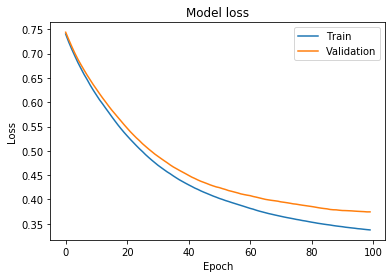

In [35]:
# Plot training & validation loss values
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

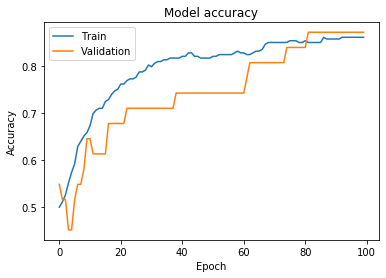

In [36]:
# Plot training & validation accuracy values
plt.plot(baseline_history.history['acc'])
plt.plot(baseline_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [37]:
baseline_predictions = np.rint(baseline_model.predict(X)).astype(int)

In [38]:
accuracy_score(y, baseline_predictions)

0.8613861386138614